In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from helper.manage_orderbooks import extract_orderbooks_for_one_currencypair, load_orderbook_snapshot, plot_episode, OrderbookEpisodesGenerator
from helper.orderbook_container import OrderbookContainer
from helper.orderbook_trader import OrderbookTradingSimulator

In [3]:
filename = '/home/axel/data/small/obs_2016-11_USDT_BTC_maxVol100.dict'

# data = load_orderbook_snapshot(filename, last_line=120)

T = 4
period_length = 15
episode_windows = OrderbookEpisodesGenerator(filename=filename, episode_length=T*period_length)
print("Length of episode_windows: {}".format(len(episode_windows)))
print(len(episode_windows[0]))

Length of episode_windows: 541
60


In [4]:
data = list(episode_windows[:2])

In [5]:
data[0][0]

OrderbookContainer from 2016-11-08T10:00 (factor: 1.0)
  107 bids (best: 705.0)
  110 asks (best: 705.450997)
price: 705.2254744655137
  kind: 'orderbook'

In [6]:
episode_windows[1][0]

OrderbookContainer from 2016-11-08T11:01 (factor: 1.0)
  110 bids (best: 704.5778597)
  121 asks (best: 706.0809733)
price: 705.329149561763
  kind: 'orderbook'

2016-11-08 11:01:00 2016-11-08 11:00:00 0 days 00:01:00


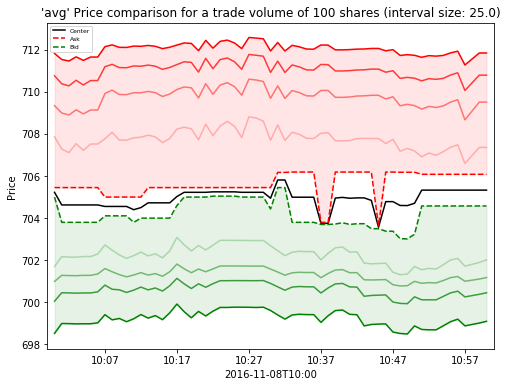

2016-11-08 12:01:00 2016-11-08 12:00:00 0 days 00:01:00


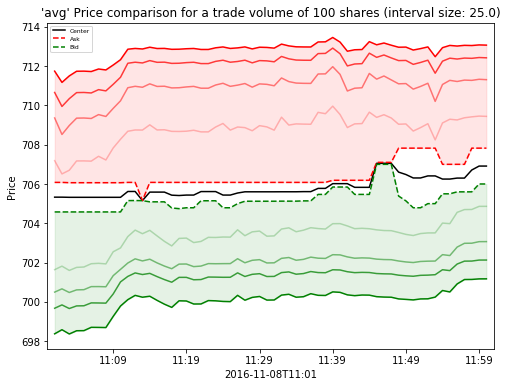

In [7]:
plot_episode(episode_windows[0], volume=100, intervals=4)
plot_episode(episode_windows[1], volume=100, intervals=4)

#### Test Orderbook plot, print and compare_with

,Amount,Type
703.700000,0.001250,bid
705.000000,0.158232,bid
705.225474,NaN,center
705.450997,2.902181,ask
705.451000,0.270000,ask


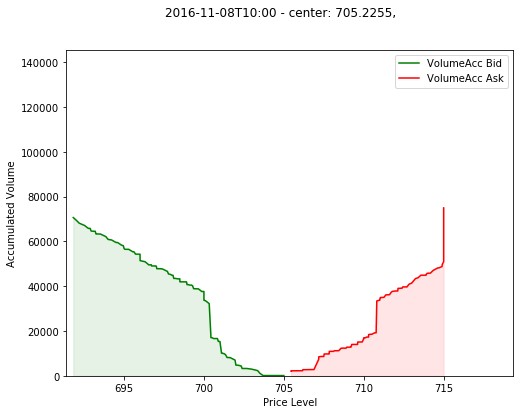

OrderbookContainer from 2016-11-08T10:00 (factor: 1.0)
  107 bids (best: 705.0)
  110 asks (best: 705.450997)
price: 705.2254744655137
  kind: 'orderbook'
OrderbookContainer from 2016-11-08T10:01 (factor: 1.0)
  105 bids (best: 703.8007878)
  111 asks (best: 705.4509968)
price: 704.6255702387916
  kind: 'orderbook'


In [8]:
orderbook = data[0][0]
orderbook2 = data[0][1]

display(orderbook.head(2))
orderbook.plot(range_factor=1.02)  # outfile='sample.pdf')
print(orderbook)
print(orderbook2)

In [9]:
orderbook = data[0][0]
orderbook2 = data[0][1]

display(orderbook.head())
display(orderbook2.head())

print("\nCompare two orderbooks:")
diff = orderbook2.compare_with(other=orderbook)

display(diff.head(10))
print(diff)

,Amount,Type
703.500002,1.461657,bid
703.700000,0.001250,bid
705.000000,0.158232,bid
705.225474,NaN,center
705.450997,2.902181,ask
705.451000,0.270000,ask
706.171065,0.052838,ask


,Amount,Type
703.357979,1.700000,bid
703.700000,0.001250,bid
703.800788,5.276769,bid
704.625570,NaN,center
705.450997,3.607053,ask
705.450997,1.172100,ask
705.451000,0.270000,ask



Compare two orderbooks:


,Amount,Type
701.150023,-0.193348,bid
701.133969,0.192838,bid
700.301359,0.272714,bid
698.228631,-0.273436,bid
697.842687,0.334005,bid
695.384016,0.385676,bid
694.842947,-0.334889,bid
694.010870,-0.386696,bid
692.000000,-1.984544,bid
691.822960,-1.610000,bid


OrderbookContainer from 2016-11-08T10:01 (factor: 1.0)
  17 bids (best: 691.8229603)
  7 asks (best: 705.4509968)
price: 698.6148249260847
  kind: 'diff'


#### Test get_current_price()

In [10]:
display(orderbook.head(3))
vol = 10

for factor in [0.25, 0.5, 0.75, 1.]:
    res = orderbook.get_current_price(vol*factor)
    print("MarketOrderPrice for {} shares: {:1.4f} (worst price: {})".format(vol*factor, res[0], res[1]))

,Amount,Type
703.500002,1.461657,bid
703.700000,0.001250,bid
705.000000,0.158232,bid
705.225474,NaN,center
705.450997,2.902181,ask
705.451000,0.270000,ask
706.171065,0.052838,ask


MarketOrderPrice for 2.5 shares: 1763.6275 (worst price: 705.450997)
MarketOrderPrice for 5.0 shares: 3529.6919 (worst price: 707.1810601)
MarketOrderPrice for 7.5 shares: 5297.6445 (worst price: 707.1810601)
MarketOrderPrice for 10.0 shares: 7065.5972 (worst price: 707.1810601)


#### Test orderbook.head and tail

In [ ]:
display(orderbook.head(2))
display(orderbook.tail(2))

#### Test parameter limit

In [ ]:
len(episode_windows[0])
from time import sleep, perf_counter as pc

In [ ]:
import time
def timefunc(f):
    def f_timer(*args, **kwargs):
        start = time.time()
        result = f(*args, **kwargs)
        end = time.time()
        print(f.__name__, 'took', end - start, 'time')
        return result
    return f_timer

In [ ]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

@timing
def f(a):
    for _ in range(a):
        i = 0
    return -1

f(100)

In [16]:
def test_trade():
    P = 15
    vol=100
    cash=0
    T = 4        
    
    datasub = data[0]
    #plot_episode(datasub, volume=vol, intervals=10)
    
    ots = OrderbookTradingSimulator(orderbooks=datasub, volume=vol, cash=cash, tradingperiods=T, period_length=P)

    for i in range(4):
        print(i)
        summary = ots.trade(limit=707)
        display(summary)
        print("")
    
    display(ots.history)
    display(summary)
    
    print(summary['cash']/100.)
    
    return ots.history

test = test_trade()

0
cash -2805.18638016 -2805.1863801612762
cash -11531.0750436 -11531.075043591174
cash -16178.6606893 -16178.660689315588
cash -19577.845121 -19577.84512104327
cash -24214.3362436 -24214.33624359965
cash -27650.3525087 -27650.352508735596
cash -31082.0834678 -31082.083467803313
cash -34515.2683613 -34515.268361295166
cash -37821.1864376 -37821.18643755785
cash -40405.6474603 -40405.647460260465
cash -42994.4444109 -42994.44441089795
cash -46355.8455276 -46355.845527575875
cash -48913.8091865 -48913.809186539176
cash -51014.0994482 -51014.09944819745
cash -53405.9976491 -53405.99764907224


{'cash': -53405.99764907224,
 'cost': 4.2446090127100868,
 'done': False,
 'remaining': 24.310727069999999,
 'traded': 75.689272930000001}


1
cash -3160.56946519 -56566.567114266276
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.52642477 -58963.524073840184
cash -5557.60684618 -58963.604495254185
cash -5557.60684618 -58963.604495254185


{'cash': -58963.604495254185,
 'cost': 4.513979134129217,
 'done': False,
 'remaining': 16.432636299999999,
 'traded': 83.567363700000001}


2
cash -1164.1666751 -60127.771170350745
cash -1164.1666751 -60127.771170350745
cash -1164.1666751 -60127.771170350745
cash -1164.7534851 -60128.357980350745
cash -2890.55665274 -61854.16114799579
cash -5485.03977679 -64448.64427204788
cash -8135.68979942 -67099.29429467469
cash -8823.70490579 -67787.30940104226
cash -9695.91753143 -68659.52202668124
cash -11601.109632 -70564.7141273


{'cash': -70564.71412726953,
 'cost': 6.3935071500382179,
 'done': True,
 'remaining': 0.0,
 'traded': 100.0}


3


{'cash': -70564.71412726953,
 'cost': 6.3935071500382179,
 'done': True,
 'remaining': 0.0,
 'traded': 100.0}

,ASK,Aa_InitialMarketAvg,BID,CENTER,LIMIT,SPREAD,T,VOLUME,avg,cash,cost,cost_old,forced,high,initialMarketAvg,low,volume_traded
2016-11-08T10:00,705.450997,711.820687,705.000000,705.225474,707,0.450997,15,100.000000,705.59533,-53405.997649,4.244609,0.039695,False,706.885862,711.820687,705.000000,75.689273
2016-11-08T10:15,705.450973,711.820687,704.000000,704.725238,707,1.450973,15,24.310727,705.45098,-5557.606846,0.269370,0.002519,False,705.451000,711.820687,705.450972,7.878091
2016-11-08T10:30,705.451000,711.820687,704.438768,704.944763,707,1.012232,15,16.432636,705.97982,-11601.109632,1.879528,0.017577,False,707.000000,711.820687,703.800000,16.432636


{'cash': -70564.71412726953,
 'cost': 6.3935071500382179,
 'done': True,
 'remaining': 0.0,
 'traded': 100.0}

-705.647141273


In [ ]:
print(hist[['ASK', 'BID', 'CENTER', 'LIMIT', 'VOLUME', 'avg', 'cost', 'forced', 'high', 'volume_traded']].to_latex(float_format="%.3f"))

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    summary = ots.trade(limit=706, verbose=True)

display(ots.history)
display(summary)


#### Test parameter aggression_factor

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    action=0.9
    summary = ots.trade(agression_factor=action, verbose=True, extrainfo={'ACTION':action})
display(ots.history)